# Water Meter Display Region Detection Using Yolov8




1.   Environment Preparation
3.   Data Analysis
2.   Data Pre-processing
3.   Model Selection and Training
4.   Model Testing and Evaluation




## 1. Environment Preparation:


### Connect to Google Drive and Set Path

In [ ]:
from google.colab import drive

# Mount your Google Drive to the notebook
drive.mount('/content/drive')

# Set the directory path you want to save your files to
save_path = '/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8'

# Change the current working directory to the save path
%cd $save_path


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8


### Check NVIDIA GPUs Status

In [ ]:
!nvidia-smi

Mon Jun 24 13:40:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 2. Data Analysis:

In [ ]:
import os

def display_directory_tree(directory, indent=''):
    print(indent + os.path.basename(directory) + '/')
    indent += '    '
    for item in os.listdir(directory):
        item_path = os.path.join(directory, item)
        if os.path.isdir(item_path):
            display_directory_tree(item_path, indent)

data_dir = "/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/data"
display_directory_tree(data_dir)


data/
    train/
        labels/
        images/
    val/
        images/
        labels/
    test/


# 3. Data Pre-processing:

### a. Convert annotation .json files into Yolo readable format:

In [ ]:
import os
import json

def convert_to_yolo(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)

    height = data["size"]["height"]
    width = data["size"]["width"]

    objects = data["objects"]
    yolo_annotations = []

    for obj in objects:
        x, y = obj["bitmap"]["origin"]
        w = len(obj["bitmap"]["data"]) // height
        h = height

        # Normalize coordinates and dimensions
        x_center = (x + w/2) / width
        y_center = (y + h/2) / height
        norm_width = w / width
        norm_height = h / height

        class_label = 0  # You may need to assign different class labels based on your dataset

        yolo_annotations.append(f"{class_label} {x_center} {y_center} {norm_width} {norm_height}")

    return yolo_annotations

# Input and output directories
input_dir = "/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/ds/annotation"
output_dir = "/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/ds/annotation1"

# Create output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Process each JSON annotation file in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".json"):
        json_file = os.path.join(input_dir, filename)
        yolo_annotations = convert_to_yolo(json_file)

        # Write the YOLO annotations to a text file in the output directory
        output_file = os.path.join(output_dir, filename[:-5] + ".txt")  # Remove .json extension
        with open(output_file, "w") as f:
            for annotation in yolo_annotations:
                f.write(annotation + "\n")

print("Conversion completed.")


Conversion completed.


## b. Split Data-set into Train, Validation and Test sets (80% 10% 10%)

In [ ]:
import os
import shutil

# Source and destination directories
source_dir = "/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/ds/images"
destination_dir = "/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/ds/Data/Train/images"

# Ensure destination directory exists, create it if not
os.makedirs(destination_dir, exist_ok=True)

# Get list of files in source directory
files = os.listdir(source_dir)

# Sort files to ensure consistent order
files.sort()

# Copy the first 996 images
for file_name in files[:996]:
    source_file = os.path.join(source_dir, file_name)
    destination_file = os.path.join(destination_dir, file_name)
    shutil.copyfile(source_file, destination_file)
    print(f"Copied {file_name} to {destination_file}")

print("Copy completed.")



# 4. Model Selection and training:

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/data/data.yaml epochs=50 imgsz=240 plots=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/data/data.yaml, epochs=50, patience=50, batch=16, imgsz=240, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

# 5. Model Testing:

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/runs/detect/train4/weights/best.pt conf=0.25 source=/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/data/test/ save=True

2024-06-24 14:57:35.943334: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 14:57:35.943387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 14:57:35.944819: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 14:57:35.952573: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 14:57:37.177816: W tensorflow/compiler/tf2

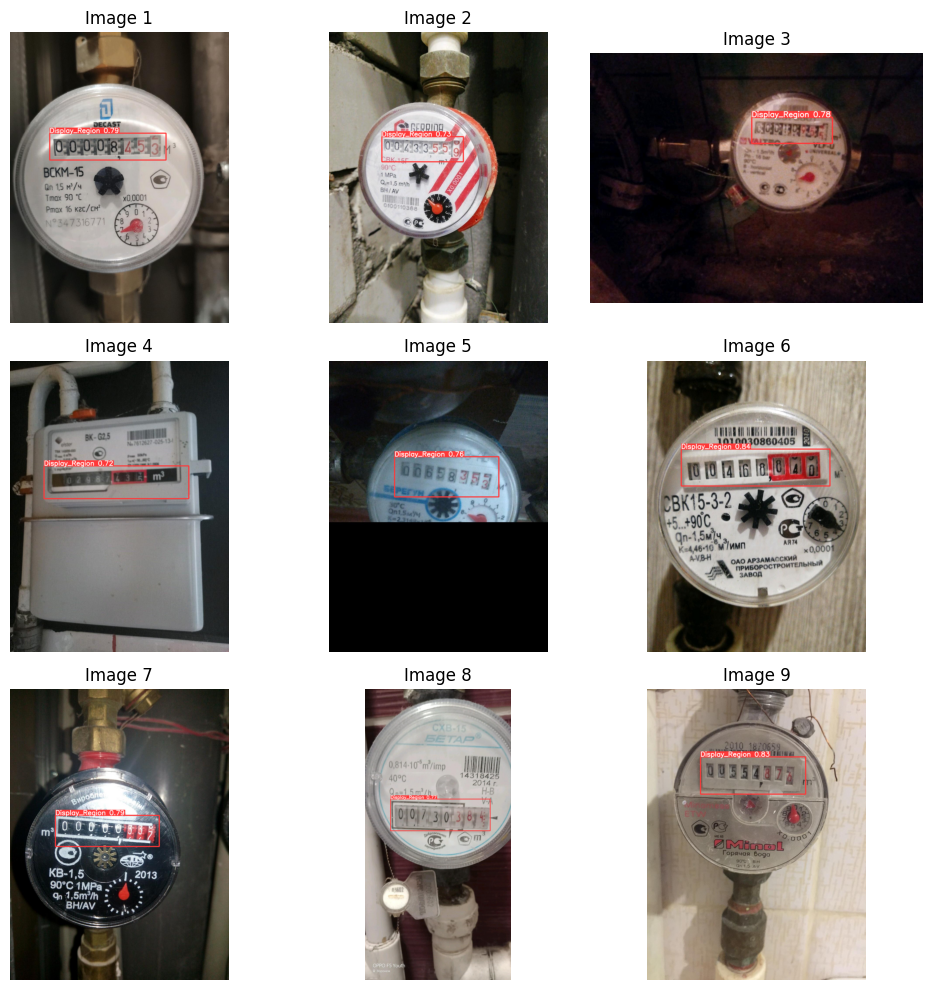

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/runs/detect/predict3/"

# Get list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Number of rows and columns in the grid
num_rows = 3
num_cols = 3

# Display images in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_rows):
    for j in range(num_cols):
        if i*num_cols + j < len(image_files):
            # Read image using matplotlib
            img = mpimg.imread(os.path.join(folder_path, image_files[i*num_cols + j]))

            # Display image
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Image {i*num_cols + j + 1}")

plt.tight_layout()
plt.show()

# 6. Model Evaluation:



## a. F1_Curve:

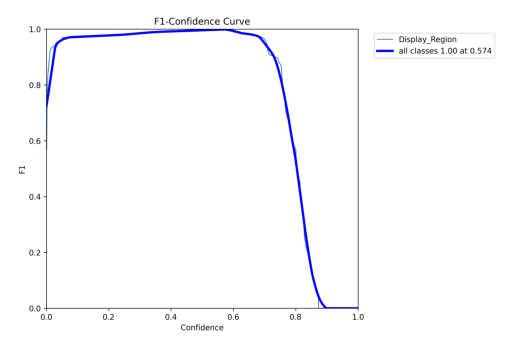

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = '/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/runs/detect/val/F1_curve.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


## b. P_curve:

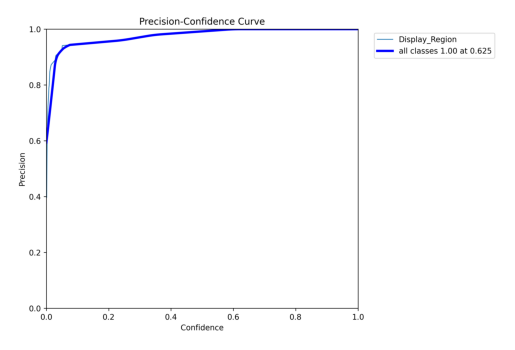

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = '/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/runs/detect/val/P_curve.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()


## c. R_curve:

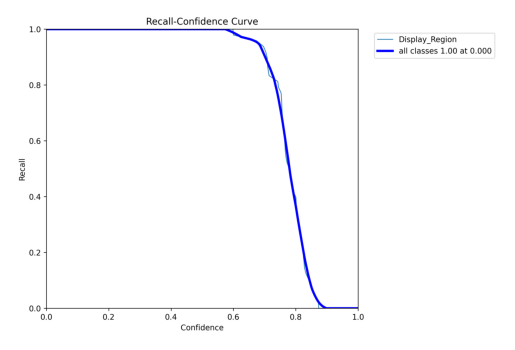

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = '/content/drive/MyDrive/PFE_2024/FirstMethod_Yolov8/runs/detect/val/R_curve.png'

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()